In [1]:
import os
import glob
import numpy as np
import nibabel as nib
import re
import pydicom
from scipy.ndimage import zoom
from PIL import Image
import matplotlib.pyplot as plt
import random


from nnunetv2.imageio.simpleitk_reader_writer import SimpleITKIO
from nnunetv2.evaluation.evaluate_predictions import labels_to_list_of_regions, compute_metrics, save_summary_json
from nnunetv2.utilities.json_export import recursive_fix_for_json_export
from batchgenerators.utilities.file_and_folder_operations import join



# Compute DSC Test

In [2]:
def compute_DSC_fold(pred_folder,  pred_files, gt_files):

    image_reader_writer = SimpleITKIO()
    regions = labels_to_list_of_regions([1, 2, 3])

    results = []
    for j, k in zip(gt_files, pred_files):
        results.append(compute_metrics(j, k, image_reader_writer, regions, None))

    # print(results)

    # mean metric per class
    metric_list = list(results[0]['metrics'][regions[0]].keys())
    means = {}
    for r in regions:
        means[r] = {}
        for m in metric_list:
            means[r][m] = np.nanmean([i['metrics'][r][m] for i in results])

    # foreground mean
    foreground_mean = {}
    for m in metric_list:
        values = []
        for k in means.keys():
            if k == 0 or k == '0':
                continue
            values.append(means[k][m])
        foreground_mean[m] = np.mean(values)

    [recursive_fix_for_json_export(i) for i in results]
    recursive_fix_for_json_export(means)
    recursive_fix_for_json_export(foreground_mean)
    result = {'metric_per_case': results, 'mean': means, 'foreground_mean': foreground_mean}
    output_file = join(pred_folder, 'summary.json')
    save_summary_json(result, output_file)
    return result

    

In [3]:
def get_and_check_files(pred_folder, gt_dir, test_cases, img_dir, fold, id="WHSMR", name="Dataset034_MMWHSMRI"):
    gt_files = []
    img_files = []
    for i in test_cases:
        gt_files += glob.glob(os.path.join(gt_dir, f"{id}_{i}x*.nii.gz")) 
        img_files += glob.glob(os.path.join(img_dir, f"{id}_{i}x*[0-9].npy")) 

    gt_files = sorted(gt_files)
    img_files = sorted(img_files)
    pred_files = sorted(glob.glob(os.path.join(pred_folder, "*.nii.gz")))

    # assert len(gt_files) == len(img_files) == len(pred_files)

    for j, k, z in zip(gt_files, pred_files, img_files):
        new_j = re.sub(f"nnUNet_results/{name}/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_{fold}/test_postprocessed", f"nnUNet_preprocessed/{name}/gt_segmentations", k)
        new_j2 = re.sub("nnUNetPlans_2d", "gt_segmentations", z)
        new_j3 = re.sub(".npy", ".nii.gz", new_j2)
        if not new_j == new_j3 == j:
            print("HERE??")
            print(j)
            print(new_j)
            print(new_j3)
        
        
    
    return gt_files, pred_files, img_files

In [4]:
def show_results(gt_files, pred_files, images):
    i=0
    for true_file, pred_file, image_file in zip(gt_files, pred_files, images):
        # print(true_file)
        seg_pred = nib.load(pred_file).get_fdata()
        seg_true = nib.load(true_file).get_fdata()
        image_data = np.load(image_file)
        print(image_data.shape)
        break

        fig = plt.figure("visualize")
        plt.figure(figsize=(5, 2.5))
        plt.subplot(1, 3, 1)
        plt.axis("off")
        plt.title("Image")
        plt.imshow(image_data.squeeze().T, cmap="gray")
        plt.subplot(1, 3, 2)
        plt.axis("off")
        plt.title("Prediction")
        plt.imshow(seg_pred)
        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.title("Ground Truth")
        plt.imshow(seg_true)
        plt.show()
        if i == 10:
            break
        else:
            i += 1


# MRI - MRI

{(1,): {'Dice': 0.8324903205028897, 'IoU': 0.7193946787938121, 'FP': 279.59375, 'TP': 1471.171875, 'FN': 315.96875, 'TN': 46333.265625, 'n_pred': 1750.765625, 'n_ref': 1787.140625}, (2,): {'Dice': 0.864938001488958, 'IoU': 0.7939388620506698, 'FP': 141.296875, 'TP': 2605.859375, 'FN': 533.84375, 'TN': 45119.0, 'n_pred': 2747.15625, 'n_ref': 3139.703125}, (3,): {'Dice': 0.8111433674613624, 'IoU': 0.7431054028503781, 'FP': 270.921875, 'TP': 2523.046875, 'FN': 597.46875, 'TN': 45008.5625, 'n_pred': 2793.96875, 'n_ref': 3120.515625}}


<Figure size 640x480 with 0 Axes>

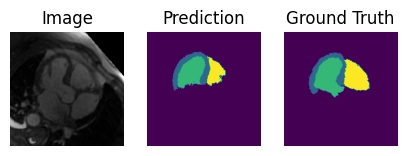

<Figure size 640x480 with 0 Axes>

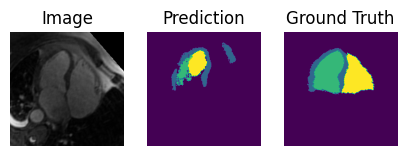

<Figure size 640x480 with 0 Axes>

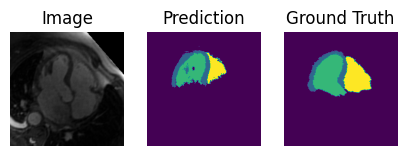

<Figure size 640x480 with 0 Axes>

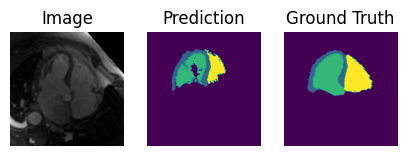

<Figure size 640x480 with 0 Axes>

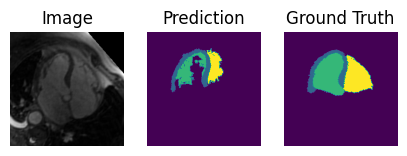

<Figure size 640x480 with 0 Axes>

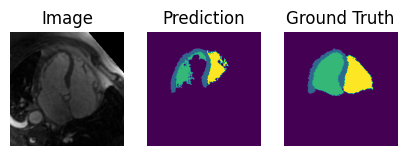

<Figure size 640x480 with 0 Axes>

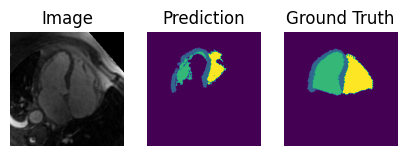

<Figure size 640x480 with 0 Axes>

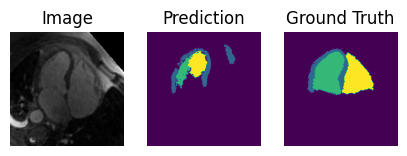

<Figure size 640x480 with 0 Axes>

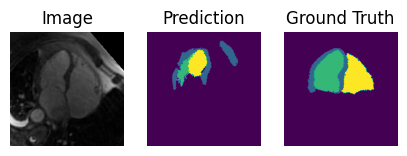

<Figure size 640x480 with 0 Axes>

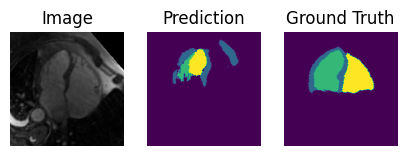

<Figure size 640x480 with 0 Axes>

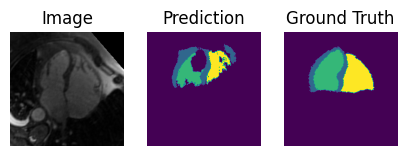

In [27]:
# fold 0
pred_folder_0 = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_0/test_postprocessed/"
gt_dir = "nnUNet_preprocessed/Dataset034_MMWHSMRI/gt_segmentations"
img_dir = "nnUNet_preprocessed/Dataset034_MMWHSMRI/nnUNetPlans_2d"
# MRI
test_cases_0 = [6, 9, 13, 16]
# CT
# test_cases_0 = [12, 13, 15, 19]

gt_files, pred_files, images = get_and_check_files(pred_folder_0, gt_dir, test_cases_0, img_dir, 0)
results0 = compute_DSC_fold(pred_folder_0, pred_files, gt_files)
res_0 = results0["mean"]
print(res_0)
show_results(gt_files, pred_files, images)


{(1,): {'Dice': 0.863404798156693, 'IoU': 0.7606978311739555, 'FP': 283.59375, 'TP': 1475.65625, 'FN': 189.34375, 'TN': 46451.40625, 'n_pred': 1759.25, 'n_ref': 1665.0}, (2,): {'Dice': 0.9429465490457931, 'IoU': 0.8947006300111825, 'FP': 114.203125, 'TP': 2719.21875, 'FN': 172.796875, 'TN': 45393.78125, 'n_pred': 2833.421875, 'n_ref': 2892.015625}, (3,): {'Dice': 0.9008189164167338, 'IoU': 0.8236707221449338, 'FP': 132.859375, 'TP': 1925.109375, 'FN': 199.1875, 'TN': 46142.84375, 'n_pred': 2057.96875, 'n_ref': 2124.296875}}


<Figure size 640x480 with 0 Axes>

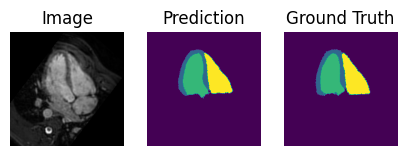

<Figure size 640x480 with 0 Axes>

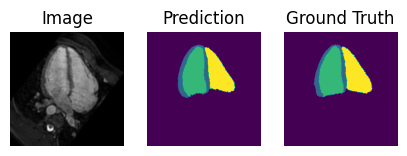

<Figure size 640x480 with 0 Axes>

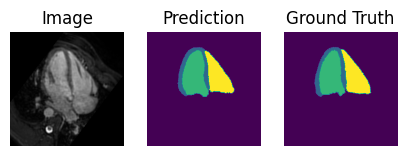

<Figure size 640x480 with 0 Axes>

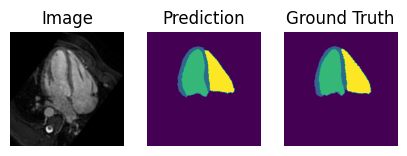

<Figure size 640x480 with 0 Axes>

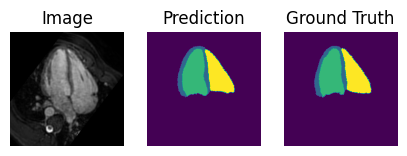

<Figure size 640x480 with 0 Axes>

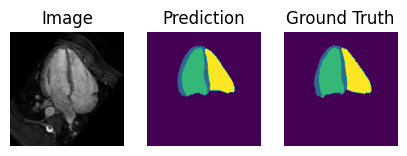

<Figure size 640x480 with 0 Axes>

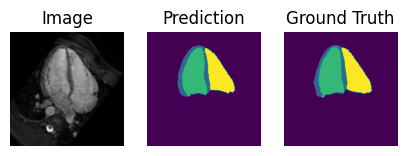

<Figure size 640x480 with 0 Axes>

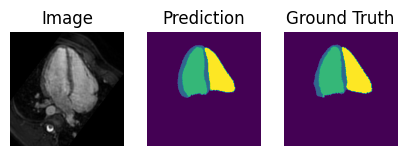

<Figure size 640x480 with 0 Axes>

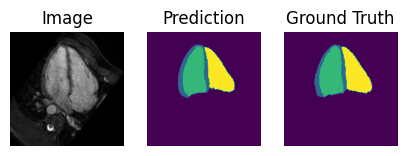

<Figure size 640x480 with 0 Axes>

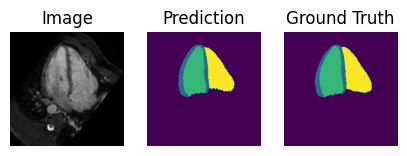

<Figure size 640x480 with 0 Axes>

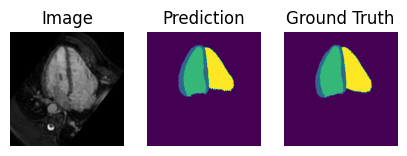

In [28]:
# fold 1
pred_folder_1 = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_1/test_postprocessed/"
# MRI
test_cases_1 = [1, 2, 4, 18]
# CT
# test_cases_1 = [7, 8, 11, 16]


gt_files, pred_files, images = get_and_check_files(pred_folder_1, gt_dir, test_cases_1, img_dir, 1)
results1 = compute_DSC_fold(pred_folder_1, pred_files, gt_files)
res_1 = results1["mean"]
print(res_1)
show_results(gt_files, pred_files, images)

In [8]:
# fold 2
pred_folder_2 = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_2/test_postprocessed/"
# MRI
test_cases_2 = [7, 12, 14, 17]
# CT
# test_cases_2 = [3, 14, 17, 18]

gt_files, pred_files, images = get_and_check_files(pred_folder_2, gt_dir, test_cases_2, img_dir, 2)
results2 = compute_DSC_fold(pred_folder_2, pred_files, gt_files)
res_2 = results2["mean"]
print(res_2)
# show_results(gt_files, pred_files, images)

{(1,): {'Dice': 0.8204080177112056, 'IoU': 0.699482870491209, 'FP': 288.296875, 'TP': 1415.828125, 'FN': 349.65625, 'TN': 46346.21875, 'n_pred': 1704.125, 'n_ref': 1765.484375}, (2,): {'Dice': 0.9436217887591712, 'IoU': 0.8951148622706119, 'FP': 135.6875, 'TP': 3382.703125, 'FN': 262.15625, 'TN': 44619.453125, 'n_pred': 3518.390625, 'n_ref': 3644.859375}, (3,): {'Dice': 0.8822436925320887, 'IoU': 0.7966838184299965, 'FP': 354.296875, 'TP': 2769.875, 'FN': 263.9375, 'TN': 45011.890625, 'n_pred': 3124.171875, 'n_ref': 3033.8125}}


In [9]:
# fold 3
pred_folder_3 = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_3/test_postprocessed/"
# MRI
test_cases_3 = [5, 10, 11, 19]
# CT
# test_cases_3 = [4, 5, 6, 10]

gt_files, pred_files, images = get_and_check_files(pred_folder_3, gt_dir, test_cases_3, img_dir, 3)
results3 = compute_DSC_fold(pred_folder_3, pred_files, gt_files)
res_3 = results3["mean"]
print(res_3)
# show_results(gt_files, pred_files, images)

{(1,): {'Dice': 0.8322610671109094, 'IoU': 0.715331906330465, 'FP': 233.796875, 'TP': 1432.6875, 'FN': 351.625, 'TN': 46381.890625, 'n_pred': 1666.484375, 'n_ref': 1784.3125}, (2,): {'Dice': 0.9439401253636872, 'IoU': 0.8952653631761673, 'FP': 118.828125, 'TP': 2761.34375, 'FN': 191.15625, 'TN': 45328.671875, 'n_pred': 2880.171875, 'n_ref': 2952.5}, (3,): {'Dice': 0.9153279926628006, 'IoU': 0.8466426098102651, 'FP': 153.28125, 'TP': 2034.0625, 'FN': 181.5625, 'TN': 46031.09375, 'n_pred': 2187.34375, 'n_ref': 2215.625}}


In [10]:
# fold 4
pred_folder_4 = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/fold_4/test_postprocessed/"
# MRI
test_cases_4 = [0, 3, 8, 15]
# CT
# test_cases_4 = [0, 1, 2, 9]

gt_files, pred_files, images = get_and_check_files(pred_folder_4, gt_dir, test_cases_4, img_dir, 4)
result4 = compute_DSC_fold(pred_folder_4, pred_files, gt_files)
res_4 = result4["mean"]
print(res_4)
# show_results(gt_files, pred_files, images)

{(1,): {'Dice': 0.7759582832291267, 'IoU': 0.6690153227092456, 'FP': 246.0625, 'TP': 1253.28125, 'FN': 587.09375, 'TN': 46313.5625, 'n_pred': 1499.34375, 'n_ref': 1840.375}, (2,): {'Dice': 0.8621479419360973, 'IoU': 0.8062630366183006, 'FP': 192.640625, 'TP': 2270.25, 'FN': 213.21875, 'TN': 45723.890625, 'n_pred': 2462.890625, 'n_ref': 2483.46875}, (3,): {'Dice': 0.7872252571009682, 'IoU': 0.6925491236434412, 'FP': 771.703125, 'TP': 1689.1875, 'FN': 83.1875, 'TN': 45855.921875, 'n_pred': 2460.890625, 'n_ref': 1772.375}}


Low performance is mainly because of case 0 and 13 in the 4th fold!!!! --> this is not performing well at all, rest is fine

In [11]:
class_1 = np.array([res_0[(1,)]["Dice"], res_1[(1,)]["Dice"], res_2[(1,)]["Dice"], res_3[(1,)]["Dice"], res_4[(1,)]["Dice"]])
print(class_1)
print(np.mean(class_1))
print(np.std(class_1))

[0.83249032 0.8634048  0.82040802 0.83226107 0.77595828]
0.8249044973421649
0.028319206202393303


In [12]:
class_2 = np.array([res_0[(2,)]["Dice"], res_1[(2,)]["Dice"], res_2[(2,)]["Dice"], res_3[(2,)]["Dice"], res_4[(2,)]["Dice"]])
print(class_2)
print(np.mean(class_2))
print(np.std(class_2))

[0.864938   0.94294655 0.94362179 0.94394013 0.86214794]
0.9115188813187414
0.039183414990411794


In [13]:
class_3 = np.array([res_0[(3,)]["Dice"], res_1[(3,)]["Dice"], res_2[(3,)]["Dice"], res_3[(3,)]["Dice"], res_4[(3,)]["Dice"]])
print(class_3)
print(np.mean(class_3))
print(np.std(class_3))

[0.81114337 0.90081892 0.88224369 0.91532799 0.78722526]
0.8593518452347908
0.05079997202958017


# No Adaptation

In [15]:
def get_and_check_files_NA(pred_folder, gt_dir, test_cases, img_dir, fold, id="WHSCT", name_results="Dataset034_MMWHSMRI", name_dataset="Dataset033_MMWHSCT"):
    gt_files = []
    img_files = []
    for i in test_cases:
        print
        gt_files += glob.glob(os.path.join(gt_dir, f"{id}_{i}x*.nii.gz")) 
        img_files += glob.glob(os.path.join(img_dir, f"{id}_{i}x*[0-9].npy")) 

    gt_files = sorted(gt_files)
    img_files = sorted(img_files)
    pred_files = sorted(glob.glob(os.path.join(pred_folder, "*.nii.gz")))

    assert len(gt_files) == len(img_files) == len(pred_files)

    for j, k, z in zip(gt_files, pred_files, img_files):
        new_j = re.sub(f"nnUNet_results/{name_results}/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_{fold}/test_postprocessed", f"nnUNet_preprocessed/{name_dataset}/gt_segmentations", k)
        new_j2 = re.sub("nnUNetPlans_2d", "gt_segmentations", z)
        new_j3 = re.sub(".npy", ".nii.gz", new_j2)
        if not new_j == new_j3 == j:
            print("HERE??")
            print(j)
            print(new_j)
            print(new_j3)
        
        
    
    return gt_files, pred_files, img_files

{(1,): {'Dice': 0.02838850231729071, 'IoU': 0.015219720788845145, 'FP': 666.21875, 'TP': 35.09375, 'FN': 1932.5, 'TN': 45766.1875, 'n_pred': 701.3125, 'n_ref': 1967.59375}, (2,): {'Dice': 0.34459015597734266, 'IoU': 0.23940398836375476, 'FP': 893.953125, 'TP': 806.40625, 'FN': 1297.671875, 'TN': 45401.96875, 'n_pred': 1700.359375, 'n_ref': 2104.078125}, (3,): {'Dice': 0.1671066503159631, 'IoU': 0.10210118808359925, 'FP': 2820.3125, 'TP': 440.8125, 'FN': 1246.78125, 'TN': 43892.09375, 'n_pred': 3261.125, 'n_ref': 1687.59375}}


<Figure size 640x480 with 0 Axes>

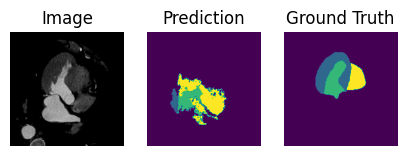

<Figure size 640x480 with 0 Axes>

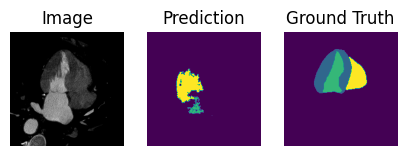

<Figure size 640x480 with 0 Axes>

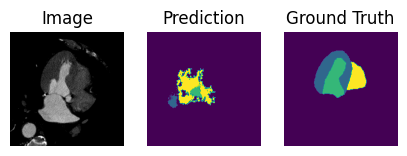

<Figure size 640x480 with 0 Axes>

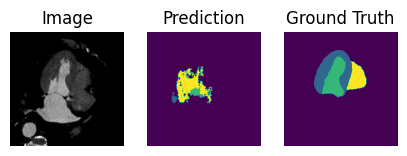

<Figure size 640x480 with 0 Axes>

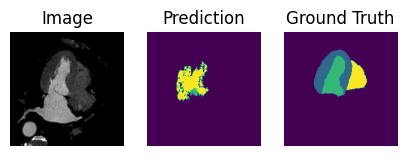

<Figure size 640x480 with 0 Axes>

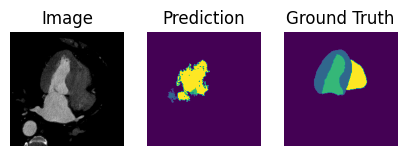

<Figure size 640x480 with 0 Axes>

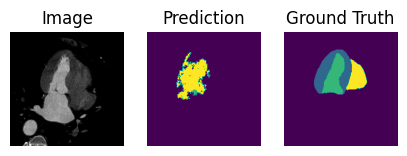

<Figure size 640x480 with 0 Axes>

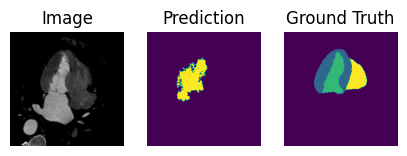

<Figure size 640x480 with 0 Axes>

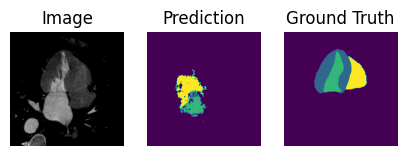

<Figure size 640x480 with 0 Axes>

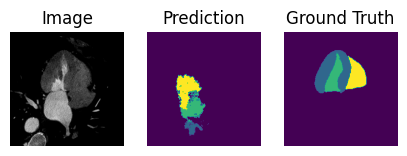

<Figure size 640x480 with 0 Axes>

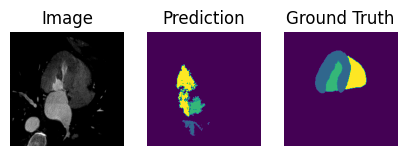

In [29]:
# NA fold 0
pred_folder = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_0/test_postprocessed"
gt_dir = "nnUNet_preprocessed/Dataset033_MMWHSCT/gt_segmentations"
img_dir = "nnUNet_preprocessed/Dataset033_MMWHSCT/nnUNetPlans_2d"

# CT
test_cases_NA0 = [12, 13, 15, 19]

# MRI
# test_cases_NA0 = [6, 9, 13, 16]

gt_files, pred_files, images = get_and_check_files_NA(pred_folder, gt_dir, test_cases_NA0, img_dir, 0)
results = compute_DSC_fold(pred_folder, pred_files, gt_files)
res_NA0 = results["mean"]
print(res_NA0)

show_results(gt_files, pred_files, images)

In [17]:
# NA fold 1
pred_folder = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_1/test_postprocessed"

# MRI
# test_cases_NA1 = [1, 2, 4, 18]
# CT
test_cases_NA1 = [7, 8, 11, 16]

gt_files, pred_files, images = get_and_check_files_NA(pred_folder, gt_dir, test_cases_NA1, img_dir, 1)
results = compute_DSC_fold(pred_folder, pred_files, gt_files)
res_NA1 = results["mean"]

<Figure size 640x480 with 0 Axes>

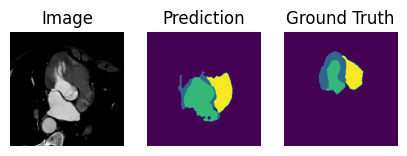

<Figure size 640x480 with 0 Axes>

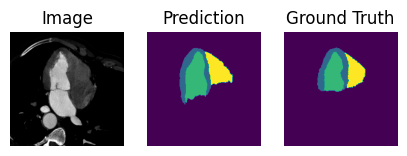

<Figure size 640x480 with 0 Axes>

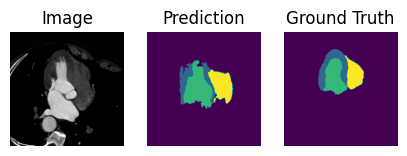

<Figure size 640x480 with 0 Axes>

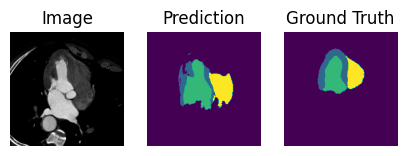

<Figure size 640x480 with 0 Axes>

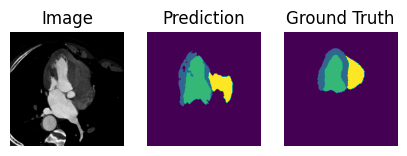

<Figure size 640x480 with 0 Axes>

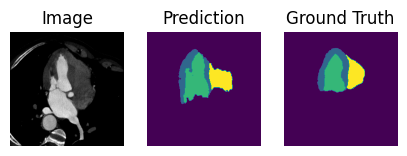

<Figure size 640x480 with 0 Axes>

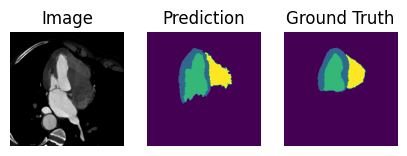

<Figure size 640x480 with 0 Axes>

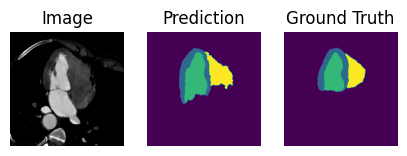

<Figure size 640x480 with 0 Axes>

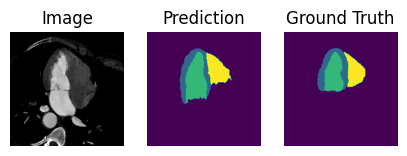

<Figure size 640x480 with 0 Axes>

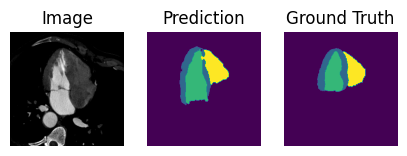

<Figure size 640x480 with 0 Axes>

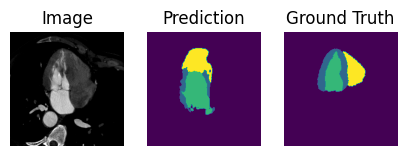

In [30]:
# NA fold 2
pred_folder = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_2/test_postprocessed"

# MRI
# test_cases_NA2 = [7, 12, 14, 17]
# CT
test_cases_NA2 = [3, 14, 17, 18]

gt_files, pred_files, images = get_and_check_files_NA(pred_folder, gt_dir, test_cases_NA2, img_dir, 2)
results = compute_DSC_fold(pred_folder, pred_files, gt_files)
res_NA2 = results["mean"]
show_results(gt_files, pred_files, images)

<Figure size 640x480 with 0 Axes>

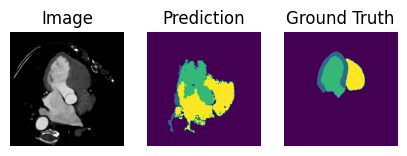

<Figure size 640x480 with 0 Axes>

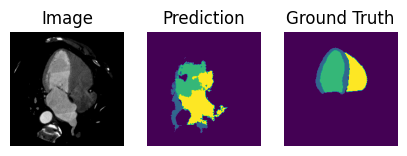

<Figure size 640x480 with 0 Axes>

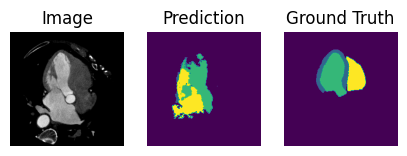

<Figure size 640x480 with 0 Axes>

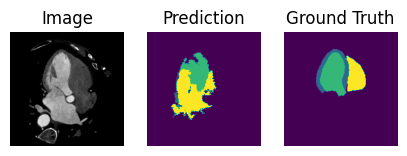

<Figure size 640x480 with 0 Axes>

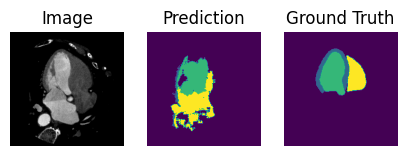

<Figure size 640x480 with 0 Axes>

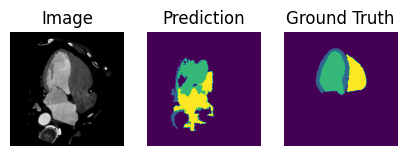

<Figure size 640x480 with 0 Axes>

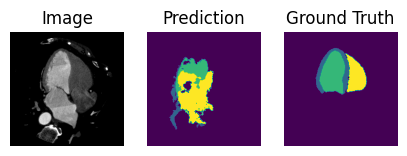

<Figure size 640x480 with 0 Axes>

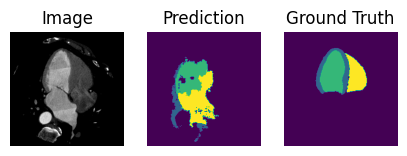

<Figure size 640x480 with 0 Axes>

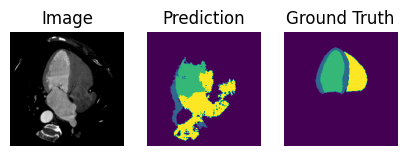

<Figure size 640x480 with 0 Axes>

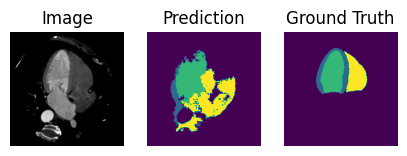

<Figure size 640x480 with 0 Axes>

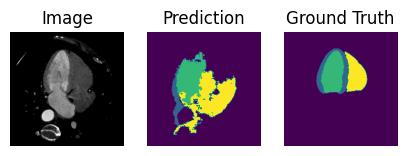

In [31]:
# NA fold 3
pred_folder = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_3/test_postprocessed"

# MRI
# test_cases_NA3 = [5, 10, 11, 19]
# CT
test_cases_NA3 = [4, 5, 6, 10]

gt_files, pred_files, images = get_and_check_files_NA(pred_folder, gt_dir, test_cases_NA3, img_dir, 3)
results = compute_DSC_fold(pred_folder, pred_files, gt_files)
res_NA3 = results["mean"]
show_results(gt_files, pred_files, images)

In [20]:
# NA fold 4
pred_folder = "nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetResEncUNetLPlans__2d/test_NA/fold_4/test_postprocessed"

# MRI
# test_cases_NA4 = [0, 3, 8, 15]
# CT
test_cases_NA4 = [0, 1, 2, 9]

gt_files, pred_files, images = get_and_check_files_NA(pred_folder, gt_dir, test_cases_NA4, img_dir, 4)
results = compute_DSC_fold(pred_folder, pred_files, gt_files)
res_NA4 = results["mean"]


In [21]:
class_1 = np.array([res_NA0[(1,)]["Dice"], res_NA1[(1,)]["Dice"], res_NA2[(1,)]["Dice"], res_NA3[(1,)]["Dice"], res_NA4[(1,)]["Dice"]])
print(class_1)
print(np.mean(class_1))
print(np.std(class_1))

[0.0283885  0.31277842 0.35082983 0.14308371 0.15912889]
0.1988418705079939
0.11817133426126157


In [22]:
class_2 = np.array([res_NA0[(2,)]["Dice"], res_NA1[(2,)]["Dice"], res_NA2[(2,)]["Dice"], res_NA3[(2,)]["Dice"], res_NA4[(2,)]["Dice"]])
print(class_2)
print(np.mean(class_2))
print(np.std(class_2))

[0.34459016 0.53519733 0.60820282 0.57310245 0.50569425]
0.513357401177432
0.09119562899917488


In [23]:

class_3 = np.array([res_NA0[(3,)]["Dice"], res_NA1[(3,)]["Dice"], res_NA2[(3,)]["Dice"], res_NA3[(3,)]["Dice"], res_NA4[(3,)]["Dice"]])
print(class_3)
print(np.mean(class_3))
print(np.std(class_3))

[0.16710665 0.35512926 0.49663418 0.40555238 0.4344809 ]
0.37178067547819305
0.11209725225411235
